# **Data Augmentation:**
When we don't have enough training samples to cover diverse cases in image classification, often CNN might overfit. To address this we use a technique called data augmentation in deep learning. Data augmentation is used to generate new training samples from current training set using various transformations such as scaling, rotation, contrast change etc. In this video, we will classify flower images and see how our cnn model overfits. After that we will use data augmentation to generate new training samples and see how model performance improves.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pandas as pd
import sys
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='/content/gdrive/MyDrive/DataSets', untar=True)


228813984/228813984 [==============================] - 2s 0us/step


In [ ]:
# using this library to help read images and store them into a numpy array.
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15030133005_9728102622_z.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20410697750_c43973d1eb.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15026703621_e15e9d55f0_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15191613243_82ee8e0fe8.jpg'),
 PosixP

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

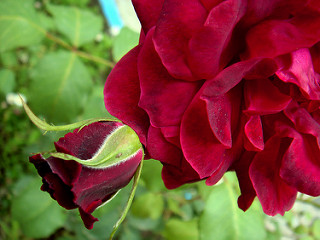

In [ ]:
roses = list(data_dir.glob('roses/*'))
len(roses)
PIL.Image.open(str(roses[5]))

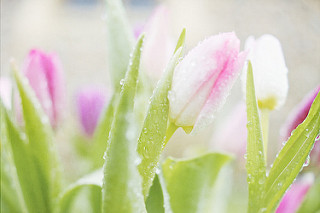

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
len(tulips)
PIL.Image.open(str(tulips[5]))

In [ ]:
#  creating a python dictionary for all image paths w.r.t category

flowers_images_dictionary = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dictionary['sunflowers']

[PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/16616096711_12375a0260_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20406385204_469f6749e2_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15030133005_9728102622_z.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20410697750_c43973d1eb.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/20407896403_a50fef58ac_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15026703621_e15e9d55f0_n.jpg'),
 PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/15191613243_82ee8e0fe8.jpg'),
 PosixP

In [ ]:
flowers_labels_dictionary = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
# str removes the windows path and returns the actual path which is must for inputs in case of some methods.
str(flowers_images_dictionary['sunflowers'][0])

'/content/gdrive/MyDrive/DataSets/datasets/flower_photos/sunflowers/3749091071_c146b33c74_n.jpg'

In [ ]:
#  reading images via filepath and storing numpy array into variable
img=cv2.imread(str(flowers_images_dictionary['sunflowers'][0]))
img.shape

(220, 320, 3)

In [ ]:
len(flowers_images_dictionary.items())
flowers_images_dictionary.items()


dict_items([('roses', [PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/7345657862_689366e79a.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/5736328472_8f25e6f6e7.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/3634244527_e72c47842c_n.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/3751835302_d5a03f55e8_n.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/datasets/flower_photos/roses/3500121696_5b6a69effb_n.jpg'), PosixPath('/content/gdrive/MyDrive/DataSets/dat

In [ ]:
#  Resizing all images to same dimension and creating X & Y.
X , Y = [] , []
# in this for loop the flower names will be the first items in the dictionary and images will be contained within these items
for flower_name, images in flowers_images_dictionary.items():
  # print(flower_name)
  # print(len(images))

  # going through all images
  for image in images:
    img = cv2.imread(str(image))
    resized_image = cv2.resize(img,(180,180))
    X.append(resized_image)
    Y.append(flowers_labels_dictionary[flower_name])


In [ ]:
X[0]

array([[[  1,   4,   2],
        [  1,   5,   1],
        [  3,   7,   4],
        ...,
        [ 49,  89,  52],
        [ 44,  92,  53],
        [ 47,  96,  55]],

       [[  0,   2,   0],
        [  1,   3,   2],
        [  3,   5,   5],
        ...,
        [ 55,  92,  49],
        [ 53,  97,  57],
        [ 53, 101,  64]],

       [[  2,   5,   3],
        [  1,   3,   3],
        [  2,   3,   3],
        ...,
        [ 59, 102,  60],
        [ 53, 103,  63],
        [ 56, 102,  60]],

       ...,

       [[ 35,  56,  35],
        [ 29,  49,  30],
        [ 28,  48,  28],
        ...,
        [ 79,  79,  78],
        [ 84,  86,  96],
        [ 72,  77,  77]],

       [[ 27,  44,  29],
        [ 26,  45,  27],
        [ 28,  49,  29],
        ...,
        [ 80,  83,  83],
        [ 82,  89,  93],
        [ 69,  75,  75]],

       [[ 14,  35,  17],
        [ 19,  41,  20],
        [ 29,  43,  28],
        ...,
        [ 78,  81,  80],
        [ 80,  86,  90],
        [ 67,  70,  75]]

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X[0]

array([[[  1,   4,   2],
        [  1,   5,   1],
        [  3,   7,   4],
        ...,
        [ 49,  89,  52],
        [ 44,  92,  53],
        [ 47,  96,  55]],

       [[  0,   2,   0],
        [  1,   3,   2],
        [  3,   5,   5],
        ...,
        [ 55,  92,  49],
        [ 53,  97,  57],
        [ 53, 101,  64]],

       [[  2,   5,   3],
        [  1,   3,   3],
        [  2,   3,   3],
        ...,
        [ 59, 102,  60],
        [ 53, 103,  63],
        [ 56, 102,  60]],

       ...,

       [[ 35,  56,  35],
        [ 29,  49,  30],
        [ 28,  48,  28],
        ...,
        [ 79,  79,  78],
        [ 84,  86,  96],
        [ 72,  77,  77]],

       [[ 27,  44,  29],
        [ 26,  45,  27],
        [ 28,  49,  29],
        ...,
        [ 80,  83,  83],
        [ 82,  89,  93],
        [ 69,  75,  75]],

       [[ 14,  35,  17],
        [ 19,  41,  20],
        [ 29,  43,  28],
        ...,
        [ 78,  81,  80],
        [ 80,  86,  90],
        [ 67,  70,  75]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)

In [ ]:
len(X_test)

918

In [ ]:
# Normalizing values for X_train and X_test
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
len(flowers_labels_dictionary)

5

In [ ]:
no_of_classes = len(flowers_labels_dictionary)
cnn = Sequential([
    layers.Conv2D(filters=32 , kernel_size=(3,3) , padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64 , kernel_size=(3,3) , padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3) , padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),

    # Dense network
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes)

])

cnn.compile(optimizer='adam',
            loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train_scaled, Y_train, epochs= 30)

Epoch 1/30
86/86 [==============================] - 7s 35ms/step - loss: 1.3701 - accuracy: 0.3983
Epoch 2/30
86/86 [==============================] - 3s 34ms/step - loss: 1.0309 - accuracy: 0.5883
Epoch 3/30
86/86 [==============================] - 3s 34ms/step - loss: 0.8590 - accuracy: 0.6639
Epoch 4/30
86/86 [==============================] - 3s 37ms/step - loss: 0.6546 - accuracy: 0.7475
Epoch 5/30
86/86 [==============================] - 3s 35ms/step - loss: 0.4051 - accuracy: 0.8590
Epoch 6/30
86/86 [==============================] - 3s 34ms/step - loss: 0.2284 - accuracy: 0.9233
Epoch 7/30
86/86 [==============================] - 3s 35ms/step - loss: 0.1220 - accuracy: 0.9604
Epoch 8/30
86/86 [==============================] - 3s 37ms/step - loss: 0.0943 - accuracy: 0.9727
Epoch 9/30
86/86 [==============================] - 3s 37ms/step - loss: 0.0589 - accuracy: 0.9815
Epoch 10/30
86/86 [==============================] - 3s 35ms/step - loss: 0.0775 - accuracy: 0.9778
Epoch 11/

In [ ]:
cnn.evaluate(X_test_scaled, Y_test)

#  model likely overfit

29/29 [==============================] - 1s 16ms/step - loss: 3.5538 - accuracy: 0.6394


[3.5538482666015625, 0.6394335627555847]

In [ ]:
predictions = cnn.predict(X_test_scaled)

29/29 [==============================] - 1s 17ms/step


In [ ]:
score = tf.nn.softmax(predictions)
score

<tf.Tensor: shape=(918, 5), dtype=float32, numpy=
array([[2.76064501e-12, 1.00000000e+00, 3.61272047e-13, 1.73907320e-15,
        5.16088169e-19],
       [9.98886645e-01, 1.30948496e-08, 3.74477786e-05, 5.48785235e-16,
        1.07596733e-03],
       [2.98901114e-06, 4.84281009e-06, 9.99992132e-01, 1.47400495e-11,
        2.15124960e-10],
       ...,
       [2.64976457e-10, 2.97355868e-12, 2.12495063e-10, 1.00000000e+00,
        1.21470771e-08],
       [2.11784979e-07, 3.02573990e-05, 4.71125459e-05, 1.48955905e-07,
        9.99922276e-01],
       [1.64307430e-08, 4.63744355e-11, 1.23726195e-02, 9.87621009e-01,
        6.38037682e-06]], dtype=float32)>

In [ ]:
f_score = np.argmax(score)

In [ ]:
# creating a data augmentation object to prevent overfitting
data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', (180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
#  CNN with data aygmentation
no_of_classes = len(flowers_labels_dictionary)
cnn_data_aug = Sequential([
    data_aug,
    layers.Conv2D(filters=32 , kernel_size=(3,3) , padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=64 , kernel_size=(3,3) , padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=128, kernel_size=(3,3) , padding ='same', activation='relu'),
    layers.MaxPooling2D(),
    # this layer will dropout 20% neurons in each pass at random.
    layers.Dropout(0.2),
    layers.Flatten(),

    # Dense network
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes)

])

cnn_data_aug.compile(optimizer='adam',
            loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ['accuracy'])

In [ ]:
cnn_data_aug.fit(X_train_scaled, Y_train, epochs= 30)

Epoch 1/30
86/86 [==============================] - 8s 60ms/step - loss: 1.3429 - accuracy: 0.4055
Epoch 2/30
86/86 [==============================] - 5s 63ms/step - loss: 1.1001 - accuracy: 0.5531
Epoch 3/30
86/86 [==============================] - 5s 58ms/step - loss: 0.9606 - accuracy: 0.6188
Epoch 4/30
86/86 [==============================] - 5s 56ms/step - loss: 0.8887 - accuracy: 0.6523
Epoch 5/30
86/86 [==============================] - 5s 55ms/step - loss: 0.8102 - accuracy: 0.6879
Epoch 6/30
86/86 [==============================] - 5s 58ms/step - loss: 0.7828 - accuracy: 0.6966
Epoch 7/30
86/86 [==============================] - 5s 55ms/step - loss: 0.7486 - accuracy: 0.7158
Epoch 8/30
86/86 [==============================] - 5s 55ms/step - loss: 0.6943 - accuracy: 0.7227
Epoch 9/30
86/86 [==============================] - 5s 57ms/step - loss: 0.6702 - accuracy: 0.7416
Epoch 10/30
86/86 [==============================] - 5s 55ms/step - loss: 0.6424 - accuracy: 0.7507
Epoch 11/

In [ ]:
cnn_data_aug.evaluate(X_test_scaled, Y_test)

29/29 [==============================] - 1s 18ms/step - loss: 0.9345 - accuracy: 0.7462


[0.9345331192016602, 0.7461873888969421]